In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [19]:
def load_data(file_path):
    """
    Loads and processes data from a file with comma-delimited rows into a flat numpy array.
    
    Args:
    - file_path (str): Path to the data file.
    
    Returns:
    - data_array (np.array): Flattened array of data values.
    """
    with open(file_path, 'r') as f:
        # Read each line, split by commas, and flatten into a single array
        data = []
        for line in f:
            values = line.strip().split(',')
            data.extend(map(int, values))  # Convert string values to integers
        return np.array(data)

def periodic_cross_correlation(data1, data2, max_lag=None):
    """
    Calcula a correlação cruzada entre duas amostras com condições de contorno periódicas.

    Args:
    - data1 (np.array): Array de entrada para a primeira amostra.
    - data2 (np.array): Array de entrada para a segunda amostra.
    - max_lag (int): Lag máximo para o qual calcular a correlação cruzada.

    Returns:
    - lags (np.array): Array de valores de lag.
    - cross_corr (np.array): Valores de correlação cruzada para cada lag.
    """
    n = len(data1)
    if max_lag is None:
        max_lag = n // 2  # Padrão para metade do comprimento dos dados

    lags = np.arange(-max_lag, max_lag + 1)
    cross_corr = np.zeros(len(lags))

    for i, lag in enumerate(lags):
        # Cálculo da correlação cruzada periódica usando rotação circular
        cross_corr[i] = np.mean(data1 * np.roll(data2, -lag))

    return lags, cross_corr

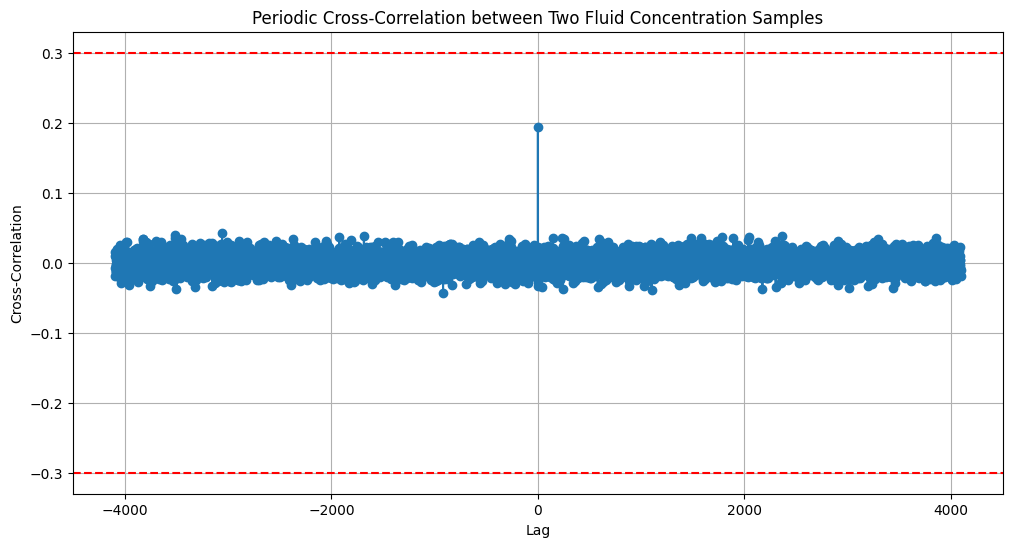

In [ ]:
sampleN1 = "002"
sampleN2 = "003"
path_1 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN1}_Satu.dat'
path_2 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN2}_Satu.dat'

# Load data from both files
data_array_1 = load_data(path_1)
data_array_2 = load_data(path_2)

# Calculate cross-correlation between the two data arrays
lags, cross_corr = periodic_cross_correlation(data_array_1, data_array_2)

# Plot the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, marker='o')
plt.axhline(y=0.3, color='red', linestyle='--', label='y = 0.3, -0.3')
plt.axhline(y=-0.3, color='red', linestyle='--')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Periodic Cross-Correlation between Two Fluid Concentration Samples')
plt.grid()
plt.show()

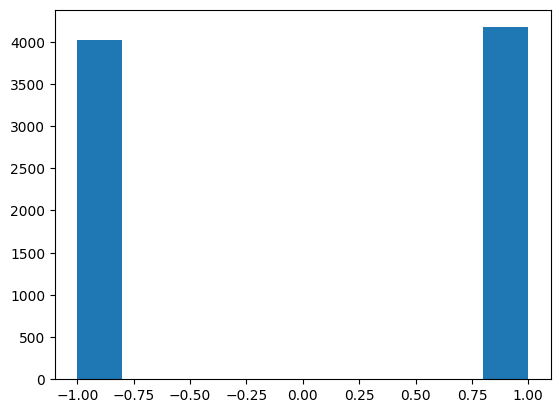

In [61]:
sampleN1 = "002"
sampleN2 = "003"
path_1 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN1}_Satu.dat'
path_2 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN2}_Satu.dat'

# Load data from both files
data_array_1 = load_data(path_1)
data_array_2 = load_data(path_2)

plt.hist(data_array_1)
plt.show()

In [57]:
values = [f"{i:03}" for i in range(1, 201)]
corr_list = []
for i in range(len(values)+1):
    path_1 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{values[i]}_Satu.dat'
    path_2 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{values[i+1]}_Satu.dat'
    data_array_1 = load_data(path_1)
    data_array_2 = load_data(path_2)
    lags, cross_corr = periodic_cross_correlation(data_array_1, data_array_2)
    filter_corr = abs(cross_corr)
    corr_list.append(max(filter_corr))
    print(i, i+1)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 51
51 52
52 53
53 54
54 55
55 56
56 57
57 58
58 59
59 60
60 61
61 62
62 63
63 64
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73
73 74
74 75
75 76
76 77
77 78
78 79
79 80
80 81
81 82
82 83
83 84
84 85
85 86
86 87
87 88
88 89
89 90
90 91
91 92
92 93
93 94
94 95
95 96
96 97
97 98
98 99
99 100
100 101
101 102
102 103
103 104
104 105
105 106
106 107
107 108
108 109
109 110
110 111
111 112
112 113
113 114
114 115
115 116
116 117
117 118
118 119
119 120
120 121
121 122
122 123
123 124
124 125
125 126
126 127
127 128
128 129
129 130
130 131
131 132
132 133
133 134
134 135
135 136
136 137
137 138
138 139
139 140
140 141
141 142
142 143
143 144
144 145
145 146
146 147
147 148
148 149
149 150
150 151
151 152
15

IndexError: list index out of range